# ENSO example notebook

This notebook contains an example of access of a dataset and ERA5 data and evaluation of the ENSO teleconnection and plot with the diagnostics part of the teleconnections module.

The only import needed is the ENSO and PlotENSO classes from the `aqua.diagnostics.teleconnections` module

In [2]:
from aqua.diagnostics.teleconnections import ENSO, PlotENSO

# Evaluating ENSO

To simplify the code below we set the two dataset we want to analyse as dictionary here. The syntax is the same as for the `Reader`.

In [3]:
dataset_dict = {
    'catalog': 'climatedt-phase1',
    'model': 'IFS-NEMO',
    'exp': 'historical-1990',
    'source': 'lra-r100-monthly',
}
obs_dict = {
    'catalog': 'obs',
    'model': 'ERA5',
    'exp': 'era5',
    'source': 'monthly',
}
common_dict = {
    'loglevel': 'INFO'
}

The initialization requires a minimal set of arguments. All other details can be set while calling the individual methods.

Notice that an instance of the class is required for each dataset.

In [4]:
enso_dataset = ENSO(**dataset_dict, **common_dict)
enso_obs = ENSO(**obs_dict, **common_dict)

We first retrieve the data. The needed variable is deduced by the class and it can be modified with YAML file (see `/config/diagnostics/teleconnections/definitions/`)

In [5]:
enso_dataset.retrieve()
enso_obs.retrieve()

2025-05-26 12:23:35 :: ConfigPath :: INFO     -> IFS-NEMO_historical-1990_lra-r100-monthly triplet found in in climatedt-phase1!
2025-05-26 12:23:35 :: ConfigPath :: WARNING  -> No paths found in the main configuration file {'climatedt-phase1': {'catalog': ['climatedt-e25.1', 'mn5-phase2', 'nextgems4', 'lumi-phase2', 'lumi-phase1', 'climatedt-phase1', 'obs'], 'machine': 'lumi', 'reader': {'catalog': '/users/mattnuri/.aqua/catalogs/climatedt-phase1/catalog.yaml', 'machine': '/users/mattnuri/.aqua/catalogs/climatedt-phase1/machine.yaml', 'fixer': '/users/mattnuri/.aqua/fixes', 'regrid': '/users/mattnuri/.aqua/grids'}, 'options': {'style': 'aqua'}}}
2025-05-26 12:23:35 :: Reader :: INFO     -> Convention dictionary: eccodes-2.39.0
2025-05-26 12:23:35 :: Reader :: INFO     -> No fixer_name found, only convention will be applied
2025-05-26 12:23:36 :: Reader :: INFO     -> Grid metadata is lon-lat
2025-05-26 12:23:36 :: Regridder :: WARNING  -> Source grid path not found. Please provide a d

The index can be computed with a simple method. A months window different from the default (3 months) can be set. The result is stored in the `index` attribute of the class.

In [6]:
enso_dataset.compute_index()
enso_obs.compute_index()

We can use the generic purpose method `save_netcdf` to save the index.

In [7]:
enso_dataset.save_netcdf(enso_dataset.index, diagnostic='enso', diagnostic_product='index')
enso_obs.save_netcdf(enso_obs.index, diagnostic='enso', diagnostic_product='index')

2025-05-26 12:24:49 :: create_folder :: INFO     -> Creating folder ./netcdf
2025-05-26 12:24:49 :: OutputSaver :: INFO     -> NetCDF file successfully saved.
2025-05-26 12:24:49 :: create_folder :: INFO     -> Folder ./netcdf already exists
2025-05-26 12:24:49 :: OutputSaver :: INFO     -> NetCDF file successfully saved.
2025-05-26 12:24:49 :: create_folder :: INFO     -> Folder ./netcdf already exists
2025-05-26 12:24:49 :: OutputSaver :: INFO     -> NetCDF file successfully saved.


We then evaluate regression and correlation. By default this is done for the entire dataset, but a season can be selected with the `season` argument.
By default the statistics is computed with the same variable as the index, but the `var` argument can be used to ask for another variable.

In [8]:
reg_data = enso_dataset.compute_regression()
reg_obs = enso_obs.compute_regression()

enso_dataset.save_netcdf(reg_data, diagnostic='enso', diagnostic_product='regression')
enso_obs.save_netcdf(reg_obs, diagnostic='enso', diagnostic_product='regression')

2025-05-26 12:24:49 :: create_folder :: INFO     -> Folder ./netcdf already exists


2025-05-26 12:24:49 :: OutputSaver :: INFO     -> NetCDF file successfully saved.
2025-05-26 12:24:49 :: create_folder :: INFO     -> Folder ./netcdf already exists
2025-05-26 12:24:49 :: create_folder :: INFO     -> Folder ./netcdf already exists
2025-05-26 12:25:27 :: OutputSaver :: INFO     -> NetCDF file successfully saved.


## Plot ENSO

The `PlotENSO` class will take care of plotting the result of multiple dataset. It will be initialized with just the indexes, specifying what is a dataset and what is the reference to compare against.

The class accept any xarray, but it will use attributes to create labels and other details. It may be needed the creation of new attributes if you want to use results that do not come from AQUA with this plot class.

In [9]:
plt = PlotENSO(indexes=enso_dataset.index, ref_indexes=enso_obs.index, loglevel='INFO')

The index plot is done with the `plot_index` method. Multiple panels are generated if multiple dataset are provided.

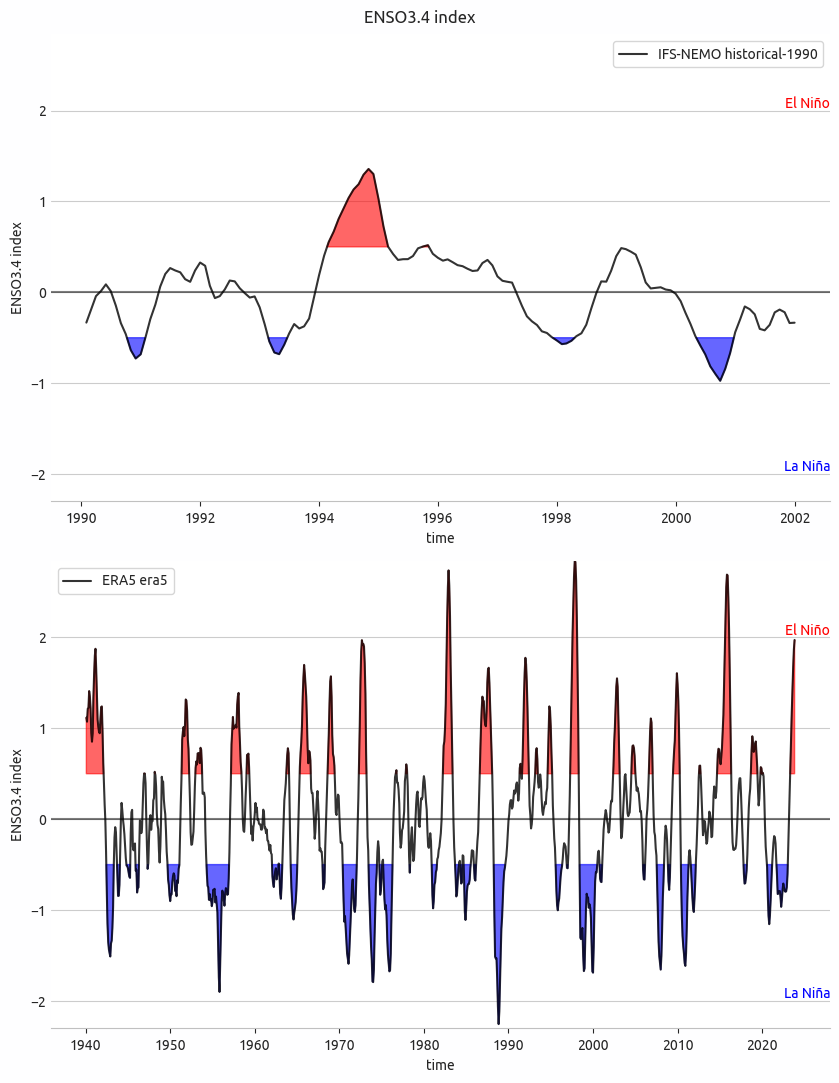

In [10]:
fig_index, _ = plt.plot_index()

We create the caption to be embedded with the metadata of the figure. We save the image as png but pdf is supported as well.

In [11]:
description = plt.set_index_description()
plt.save_plot(fig_index, diagnostic_product='index', metadata={'description': description})

2025-05-26 12:25:28 :: create_folder :: INFO     -> Folder ./png already exists


2025-05-26 12:25:30 :: add_png_metadata :: INFO     -> Metadata added to PNG: ./png/enso.index.climatedt-phase1.IFS-NEMO.historical-1990.obs.ERA5.era5.png
2025-05-26 12:25:30 :: OutputSaver :: INFO     -> Saved PNG: ./png/enso.index.climatedt-phase1.IFS-NEMO.historical-1990.obs.ERA5.era5.png
2025-05-26 12:25:30 :: OutputSaver :: INFO     -> Saved PNG: ./png/enso.index.climatedt-phase1.IFS-NEMO.historical-1990.obs.ERA5.era5.png


We strongly suggest to load the regression and correlation datasets before giving them to the plot routines, since cartopy and dask do not perform very well together.

In [12]:
reg_data.load()
reg_obs.load()

<xarray.DataArray (lat: 721, lon: 1440)> Size: 8MB
array([[            nan,             nan,             nan, ...,
                    nan,             nan,             nan],
       [            nan,             nan,             nan, ...,
                    nan,             nan,             nan],
       [            nan,             nan,             nan, ...,
                    nan,             nan,             nan],
       ...,
       [-2.40109697e-05, -2.41957936e-05, -2.41957936e-05, ...,
        -2.65009009e-05, -2.40109697e-05, -2.41957936e-05],
       [-2.40109697e-05, -1.87833712e-05, -1.92609739e-05, ...,
        -2.40109697e-05, -2.40109697e-05, -2.40109697e-05],
       [-2.49132259e-05, -2.49132259e-05, -2.49132259e-05, ...,
        -2.49132259e-05, -2.49132259e-05, -2.49132259e-05]],
      shape=(721, 1440))
Coordinates:
  * lon      (lon) float64 12kB 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * lat      (lat) float64 6kB -90.0 -89.75 -89.5 -89.25 ... 89.5 89.75 90.0
Attributes: (12/20)
    long_name:       Sea surface temperature
    units:           K
    code:            34
    table:           128
    history:         \n2025-05-26 12:24:05 AQUA💧: Variable renamed tos from S...
    paramId:         262101
    ...              ...
    diagnostic:      enso
    model:           ERA5
    experiment:      era5
    time_precision:  ymd
    catalog:         obs
    rebuild:         True

Here we show an example of plot flow. The first method will create the figure and it will be enough for the notebook usage.
However a description to be stored as metadata and a saving routine are available and shown in the following example.

2025-05-26 12:26:15 :: create_folder :: INFO     -> Folder ./png already exists
2025-05-26 12:26:17 :: add_png_metadata :: INFO     -> Metadata added to PNG: ./png/enso.regression.climatedt-phase1.IFS-NEMO.historical-1990.obs.ERA5.era5.png
2025-05-26 12:26:17 :: OutputSaver :: INFO     -> Saved PNG: ./png/enso.regression.climatedt-phase1.IFS-NEMO.historical-1990.obs.ERA5.era5.png


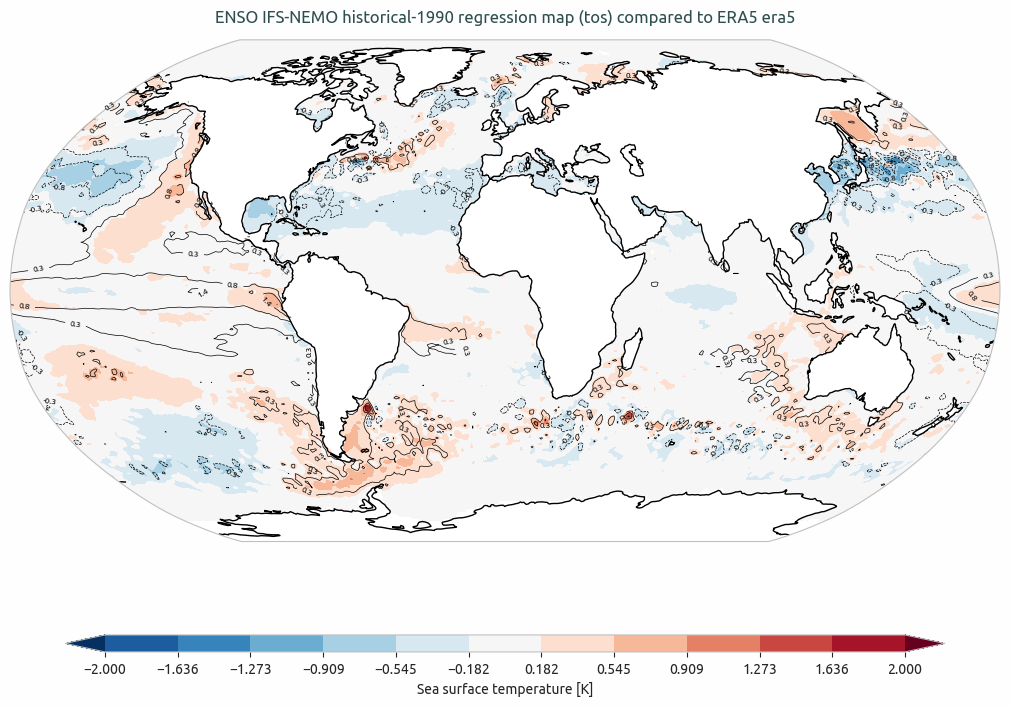

In [13]:
fig_reg = plt.plot_maps(maps=[reg_data], ref_maps=[reg_obs], statistic='regression')
description = plt.set_map_description(maps=[reg_data], ref_maps=[reg_obs], statistic='regression')
plt.save_plot(fig_reg, diagnostic_product='regression', metadata={'description': description})

# NCAR comparison

With the NAO index computed, we can compare with observational data from NCAR, to check if the index is computed correctly. NCAR data are available in the data folder available in this same folder.

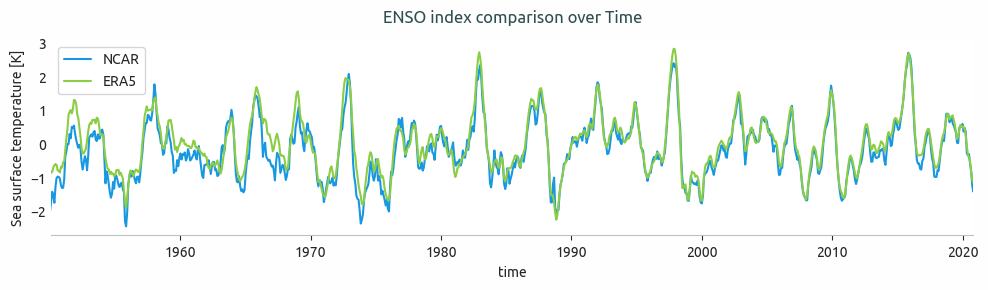

In [14]:
import datetime
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

ncar_path = 'data/nina34.anom.txt'
enso_ncar = np.genfromtxt(ncar_path,skip_header=3,skip_footer=4)

year = enso_ncar[:,0]
month_data = enso_ncar[:, 1:]
time = xr.cftime_range(start=str(int(year[0])),periods=12*len(year),freq='MS',calendar='standard')
month_data = month_data.reshape(-1)
enso_ncar = xr.DataArray(month_data, coords=[time], dims=['time'], name='monthly_data')

time_vals = np.array(time.values)

# Convert to datetime objects
datetimes = [np.datetime64(t).astype(datetime.datetime) for t in time_vals]

# Plot with matplotlib
fig = plt.figure(figsize=(10,3))
plt.plot(datetimes, enso_ncar.values,label='NCAR')

plt.xlim(datetime.datetime(1950, 1, 31, 0, 0),datetime.datetime(2020, 10, 31, 0, 0))

enso_obs.index.plot(label='ERA5')
plt.legend()
plt.title('ENSO index comparison over Time')
fig.tight_layout()

plt.show()